In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [144]:
ibm_data = pd.read_csv('IBM Attrition Data.csv')

In [145]:
ibm_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


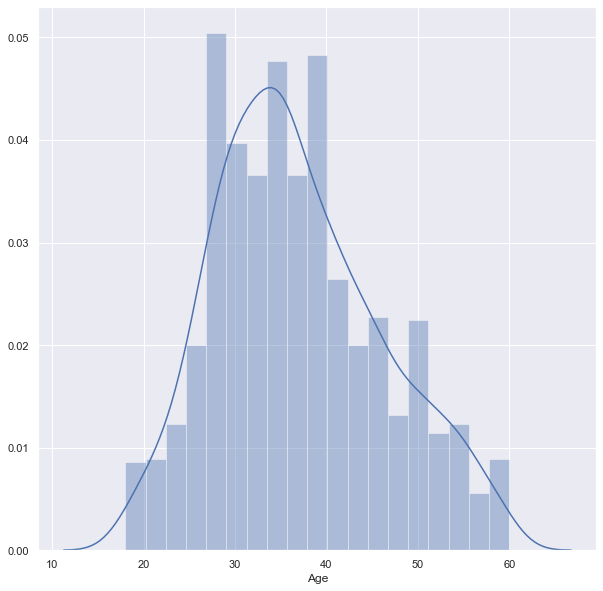

In [146]:
plt.figure(figsize=(10, 10))
age = ibm_data['Age']
sns.distplot(age)

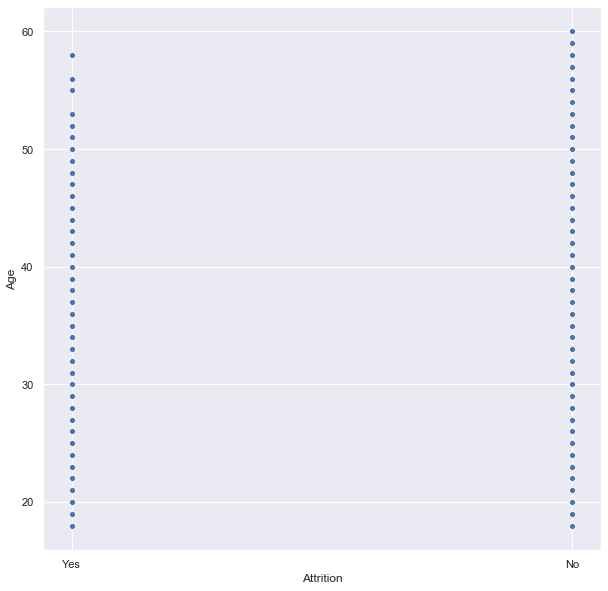

In [148]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y='Age',x='Attrition',data=ibm_data)

In [149]:
ibm_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

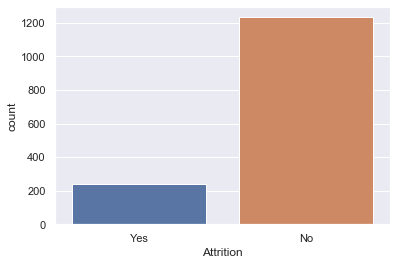

In [150]:
sns.countplot(ibm_data['Attrition'])

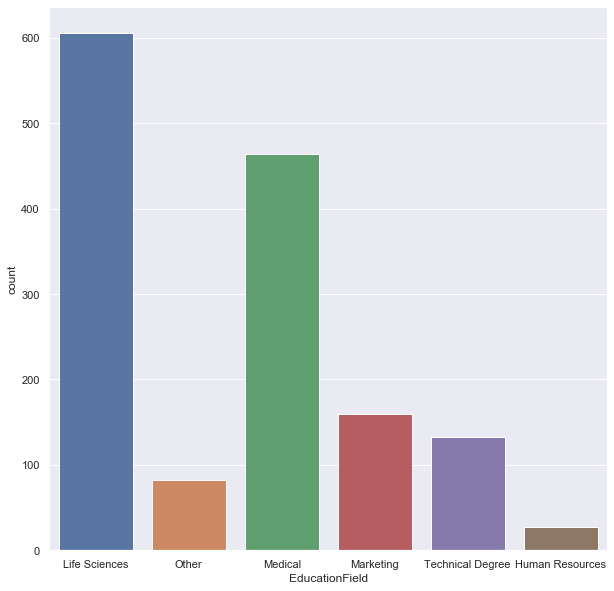

In [151]:
plt.figure(figsize=(10,10))
sns.countplot(x='EducationField',data = ibm_data)

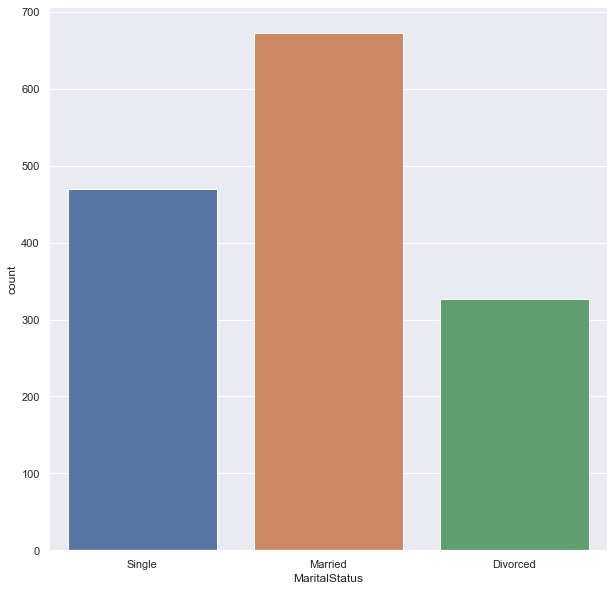

In [152]:
plt.figure(figsize=(10,10))
sns.countplot(x='MaritalStatus',data=ibm_data)

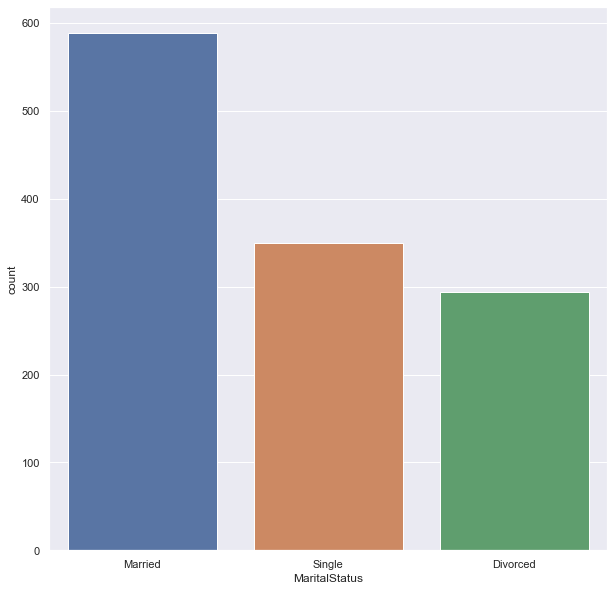

In [153]:
emp = ibm_data[ibm_data['Attrition']=='No']
plt.figure(figsize=(10,10))
sns.countplot(x='MaritalStatus',data=emp)

In [155]:
ibm_data['EducationField'].replace('Life Sciences',1,inplace=True)
ibm_data['EducationField'].replace('Medical',2,inplace=True)
ibm_data['EducationField'].replace('Marketing',3,inplace=True)
ibm_data['EducationField'].replace('Technical Degree',4,inplace=True)
ibm_data['EducationField'].replace('Other',5,inplace=True)
ibm_data['EducationField'].replace('Human Resources',6,inplace=True)

In [158]:
ibm_data['MaritalStatus'].replace('Married',1,inplace=True)
ibm_data['MaritalStatus'].replace('Single',2,inplace=True)
ibm_data['MaritalStatus'].replace('Divorced',3,inplace=True)

In [170]:
ibm_data['Attrition'].replace('Yes',1,inplace=True)
ibm_data['Attrition'].replace('No',0,inplace=True)

In [173]:
ibm_data['Department'].replace('Research & Development',1,inplace=True)
ibm_data['Department'].replace('Sales',2,inplace=True)
ibm_data['Department'].replace('Human Resources',3,inplace=True)

In [175]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   Department               1470 non-null   int64
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int64
 5   EducationField           1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int64
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int64(13)
memory usage: 149.4 KB


In [176]:
lgmodel = LogisticRegression()

In [177]:
ibm_data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [178]:
x = ibm_data[['Age', 'Department', 'DistanceFromHome', 'Education','EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','WorkLifeBalance', 'YearsAtCompany']]
y = ibm_data['Attrition']

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [180]:
lgmodel.fit(x_train,y_train)

C:\Users\Jayasooryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
lgmodel.score(x_train,y_train)

0.8341836734693877

In [183]:
predicted = lgmodel.predict(x_test)

In [199]:
metrics.accuracy_score(y_test,predicted)

0.8673469387755102